# Group Final Report
# 
###  Kai Duan, Lavanya Kandhari, Panle Li, Zidong Zhou
### Group 20
## Introduction


The selected dataset for the STAT 301 project is the Heart Diseases Dataset from Kaggle and it can be found [HERE](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)
![Heart](https://c8y.doxcdn.com/image/upload/c_fill,fl_progressive,h_800,q_auto,w_1600/gau2taystiugaa2br7zs.webp)

In [77]:
# install.packages("corrplot")
# install.packages("GGally")
# install.packages("tidymodels")
# install.packages("car")
# install.packages("glmnet")
# install.packages("caret")
# install.packages("pROC")

In [78]:
library(corrplot)
library(glmnet)
library(tidymodels)
library(tidyverse)
library(readr)
library(GGally)
library(gridExtra)

Some of these packages were installed through the code below. In case a library above is not found, 
please refer to the code block below to download all necessary packages!

### Data:
Heart disease is a leading cause of mortality worldwide, and early diagnosis and risk assessment are important for effective management and prevention. This dataset contains information related to heart disease diagnosis from 1988 and consists of Cleveland databases. It contains various clinical and demographic attributes of patients, for example, age, gender, cholesterol levels, and resting blood pressure results along with the “target” variable indicating the presence or absence of heart disease.
We will now explore the key objectives of the data to know more about it :



- We have a total number of 1025 observations, out of which 302 are unique
- We have 14 variables, out of which "target" is the response varibale and the rest are predictors
- The dataset that we will be using features 14 attributes of patients that will be examined to determine which are possible indicators of heart disease: 
    - age: age (continuous)
    - sex: binary , 1 = male; 0 = female (will be used as a categorical variable)
    - cp: chest pain type, 4 values 0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic (will be used as a categorical variable)
    - trestbps: resting blood pressure (in mm Hg on admission to the hospital)(continuous, double)
    - chol: serum cholesterol in mg/dl (continuous)
    - fbs: fasting blood sugar > 120 mg/dl binary 1 = true; 0 = false (will be used as a categorical variable)
    - restecg: resting electrocardiographic results 0: normal; 1: having ST-T wave abnormality ; 2: showing probable or definite left ventricular hypertrophy by Estes' criteria (will be used as a categorical variable)
    - thalach: maximum heart rate achieved (continuous)
    - exang: exercise induced angina, 1 = yes; 0 = no (will be used as a categorical variable)
    - oldpeak: ST depression induced by exercise relative to rest (continuous, double)
    - slope: the slope of the peak exercise ST segment 0: upsloping; 1: flat; 2: downsloping (will be used as a categorical variable)
    - ca: number of major vessels (0-3) colored by flourosopy (continuous)
    - thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (will be used as a categorical variable)
    - target: resting electrocardiographic results (values 0,1) (response variable)

This dataset has been collected by the cleveland clinical foundation, little is known about the origin but it is known that this research has been used by ML researchers to date for modelling related to heart diseases. 

### Question
Research Question: **Determine the possible numeric indicators of heart disease which will then be used to predict the presence of heart disease in patients**
    
Response Variable: Taget (1=no disease, 0 = disease)  
Explanatory Variables: age, cholesterol levels, trestbps,restecg,slope,cp

Since the data set contains all those explanatory variables, we need to first do inference, which is exploring which variable is significant to the response variable. Secondly, we need to build a model to do prediction, and those explantory variables that are significant must considered into model to get higher accuacy.

## Methods and Results
### EDA
#### Reading the data from the web:

In [79]:
heart <- read.csv("https://raw.githubusercontent.com/lavanyakandhari/Stat301-project/main/heart.csv")
head(heart)
heart_data <- (unique(heart))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [80]:
cat("dimentions of our dataset are:", dim(heart_data))

dimentions of our dataset are: 302 14


#### Data Cleaning and Wrangling

In [81]:
colnames(heart_data)[3] = "chestpain"
colnames(heart_data)[8] = "max_hrate"
colnames(heart_data)[10] = "st_depression_ind"
colnames(heart_data)[12] = "num_vessels"

#Convert integer columns representing categorical data to factors
heart_data$sex <- as.factor(heart_data$sex)
heart_data$cp <- as.factor(heart_data$chestpain)
heart_data$fbs <- as.factor(heart_data$fbs)
heart_data$restecg <- as.factor(heart_data$restecg)
heart_data$exang <- as.factor(heart_data$exang)
heart_data$slope <- as.factor(heart_data$slope)
heart_data$ca <- as.factor(heart_data$num_vessels)
heart_data$thal <- as.factor(heart_data$thal)
heart_data$target <- as.factor(heart_data$target)

#remove rows that contains NA.
data_tidy <- heart_data %>%
   drop_na()


In [82]:
unique(data_tidy$chestpain)

[1] 0 1 2 3

#### Visualizations
We will conduct visualizations between each explantory variable and use color to distinguish the heart disease presence. We have to do this to avoid multicolinarity, if some of the explantory varibale are highly correlated, it may afftet the model we build after. Also, we can see the relation between heart diseases presence with each explantory vairiable.

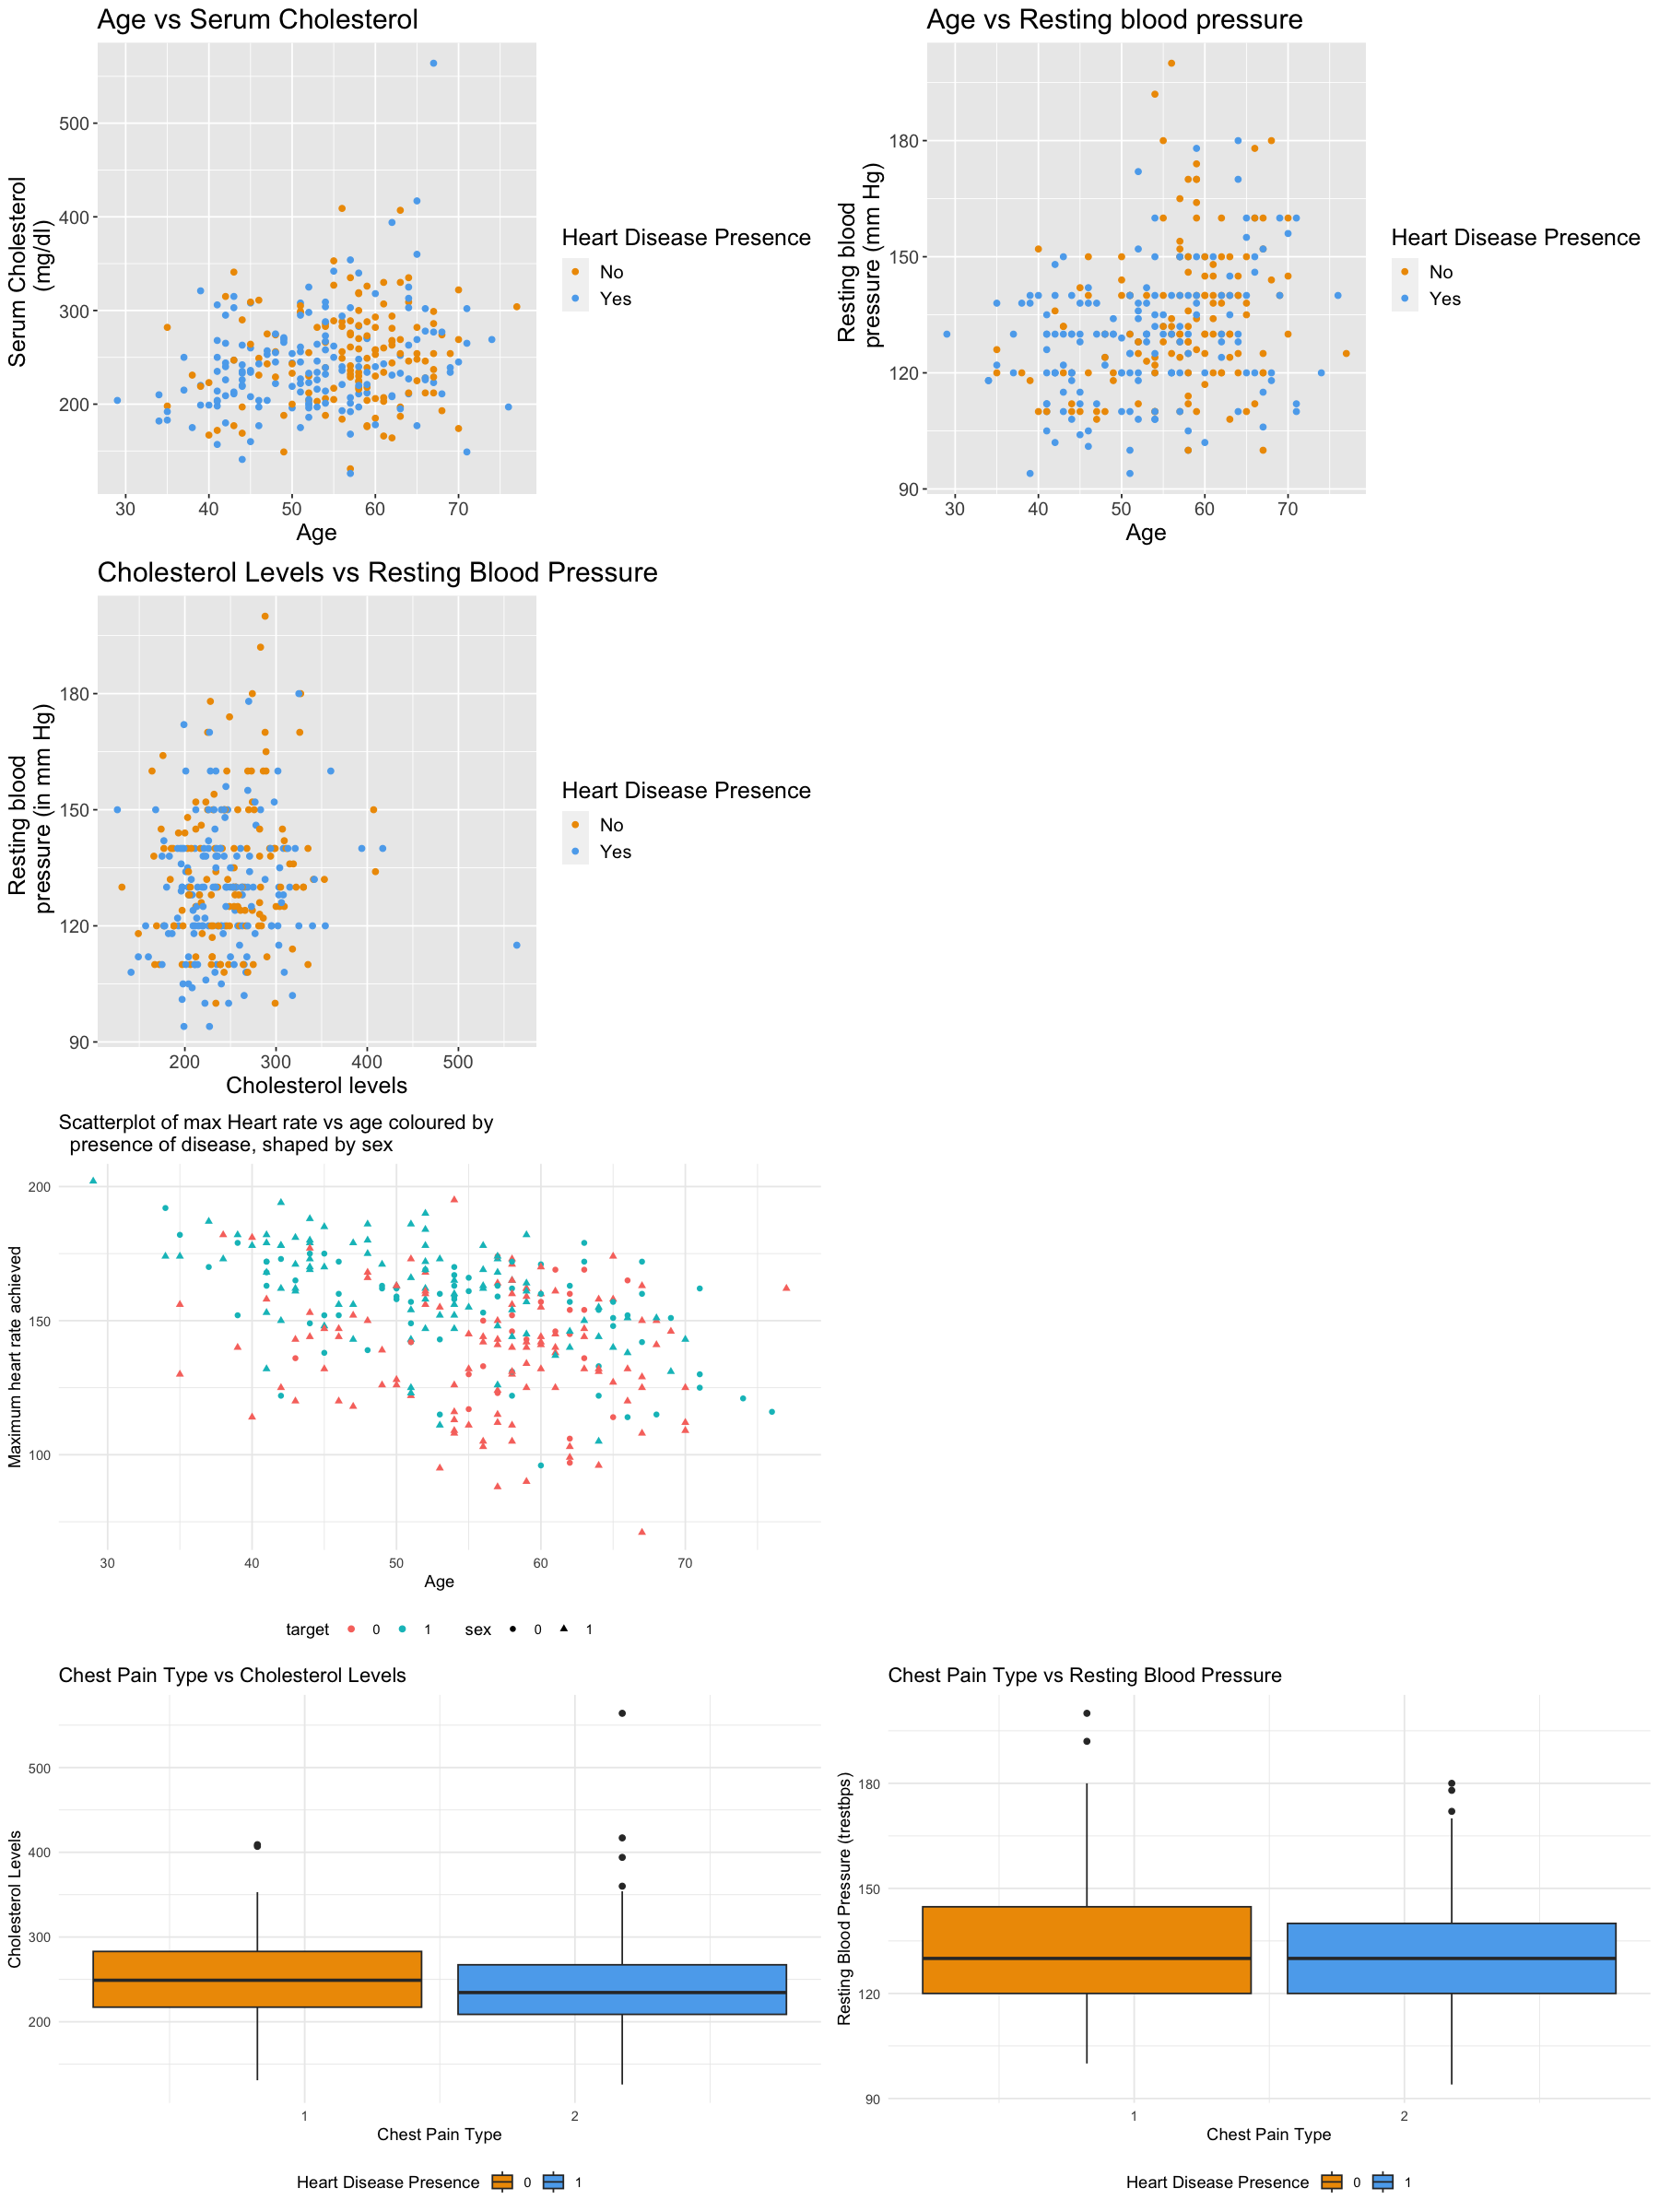

In [83]:
#relation between age, cholesterol levels
age_vs_chol <- data_tidy %>% 
    ggplot(aes(x = age, y = chol , col = target )) +
    geom_point() +
    ggtitle("Age vs Serum Cholesterol") +
    labs(x = "Age", y = "Serum Cholesterol \
    (mg/dl)", col = "Heart Disease Presence") +
    theme(text = element_text(size = 15)) +
    scale_color_manual(labels = c("No", "Yes"), 
     values = c("orange2", "steelblue2"))
#relation between age, resting blood pressure
age_vs_trestbps <- data_tidy %>% 
    ggplot(aes(x = age, y = trestbps , col = target )) +
    geom_point() +
    ggtitle("Age vs Resting blood pressure") +
    labs(x = "Age", y = "Resting blood \
    pressure (mm Hg)", col = "Heart Disease Presence") +
    theme(text = element_text(size = 15)) +
    scale_color_manual(labels = c("No", "Yes"), 
     values = c("orange2", "steelblue2"))
#relation between cholesterol levels, resting blood pressure
chol_vs_trestbps <- data_tidy %>% 
    ggplot(aes(x = chol, y = trestbps , col = target )) +
    geom_point() +
    ggtitle("Cholesterol Levels vs Resting Blood Pressure ") +
    labs(x = "Cholesterol levels", y = "Resting blood \
    pressure (in mm Hg)", col = "Heart Disease Presence") +
    theme(text = element_text(size = 15)) +
    scale_color_manual(labels = c("No", "Yes"), 
     values = c("orange2", "steelblue2"))

#relation between cholesterol levels and chest pain type
cp_vs_chol <- ggplot(heart_data, aes(x = chestpain, y = chol, fill = target)) +
  geom_boxplot() +
  ggtitle("Chest Pain Type vs Cholesterol Levels ") +
  scale_fill_manual(values = c("orange2", "steelblue2")) +  
  labs(x = "Chest Pain Type", y = "Cholesterol Levels", fill = "Heart Disease Presence") +
  theme_minimal() +
  theme(legend.position = "bottom")

#relation between trestbp and chest pain type
cp_vs_trestbps  <- ggplot(heart_data, aes(x = chestpain, y = trestbps, fill = target)) +
  geom_boxplot() +
  ggtitle("Chest Pain Type vs Resting Blood Pressure ") +
  scale_fill_manual(values = c("orange2", "steelblue2")) +  
  labs(x = "Chest Pain Type", y = "Resting Blood Pressure (trestbps)", fill = "Heart Disease Presence") +
  theme_minimal() +
  theme(legend.position = "bottom")

#relation between max Heart rate vs age coloured by presence of disease, shaped by sex
hr_vs_age <- ggplot(heart_data, aes(x = age,
                       y = max_hrate)) +
  geom_point(aes(color = target,
                 shape = sex)) +
  scale_fill_manual(values = c("orange2", "steelblue2")) +
  xlab("Age") +
  ylab("Maximum heart rate achieved") +
  labs(fill = "Dose (mg)") +
  ggtitle("Scatterplot of max Heart rate vs age coloured by \
  presence of disease, shaped by sex ") +
  theme_minimal() +
  theme(legend.position = "bottom")

#combine the graphs
combined_plot<-grid.arrange(age_vs_chol, age_vs_trestbps, chol_vs_trestbps,{},hr_vs_age,{},cp_vs_chol, cp_vs_trestbps, ncol = 2)



### Methods: Plan